In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

In [2]:
# r2 index order [task,arch,component,stat]
# task =  0 deg, 270 deg
# arch = baseline, baseline + augmentation, C4
# component = tau11,tau12,...tau33
# stat = mean, std. dev.

r2=np.array([
    #0 deg
    [
     #Baseline
        [[ 0.9624814636936906 , 0.001508686462026449],
        [0.7630807106574051 , 0.004475662032216581],
        [0.7258521090634786 , 0.003098356683264315],
        [0.7827514080054957 , 0.005570120571711476],
        [0.655977337093305 , 0.0023719586477298393],
        [0.3875076480007472 , 0.01532200646696499]],
        #Baseline + aug
        [[0.9626743448513675 , 0.0011553422906506177],
        [0.7527103769992431 , 0.005457791078707202],
        [0.7543562858840465 , 0.0034961769100474785],
        [0.7643865101598182 , 0.014726650956090296],
        [0.6765589523495041 , 0.002573567410895069],
        [0.46509462614155 , 0.03952494182591163]],
        #Local
        [[0.9675189634088672 , 0.0006760344251361841],
            [0.7847936265861674 , 0.002189522185347632],
            [0.7659986197619928 , 0.003671091043143276],
            [0.8049517830655372 , 0.004348441883946166],
            [0.6848217207440672 , 0.0024984246562171223],
            [0.5124965576562747 , 0.0173732246351104]]
    ],
     #270 deg
    [
        #Baseline
        [[ -4.184526003459114 , 0.8660868535994874],
        [-0.15137897856253243 , 0.40007780818315847],
        [0.5459678987701315 , 0.011927949352196947],
        [-0.9456965592458964 , 0.23246013826071385],
        [0.6197524246570346 , 0.02870819423005836],
        [0.31435522685741113 , 0.02928169650936578]],
        #Baseline + aug
        [[0.776319852806694 , 0.005939422121283613],
        [0.7524239092348787 , 0.007924766268982008],
        [0.6776216814973377 , 0.0032684742993388935],
        [0.9624330584347875 , 0.0021018951657422254],
        [0.7543351375049914 , 0.003568655197163812],
        [0.46986872791971085 , 0.014955940805293538]],
        #Local
        [[0.8049517801976679 , 0.004348438404422767],
        [0.784793625279582 , 0.0021895199315097756],
        [0.6848217215243105 , 0.002498425041679732],
        [0.9675189631581415 , 0.0006760345977733674],
        [0.7659986205233655 , 0.0036710911613912394],
        [0.5124965581659108 , 0.01737322235947338]]

    ]

])

In [3]:
r2.shape

(2, 3, 6, 2)

In [4]:
# r2 index order [task,split,scaling,component,stat]
# task =  Reynolds, Resolution
# split = interp or extrap
# scaling = stats, global, local
# component = tau11,tau12,...tau33
# stat = mean, std. dev.

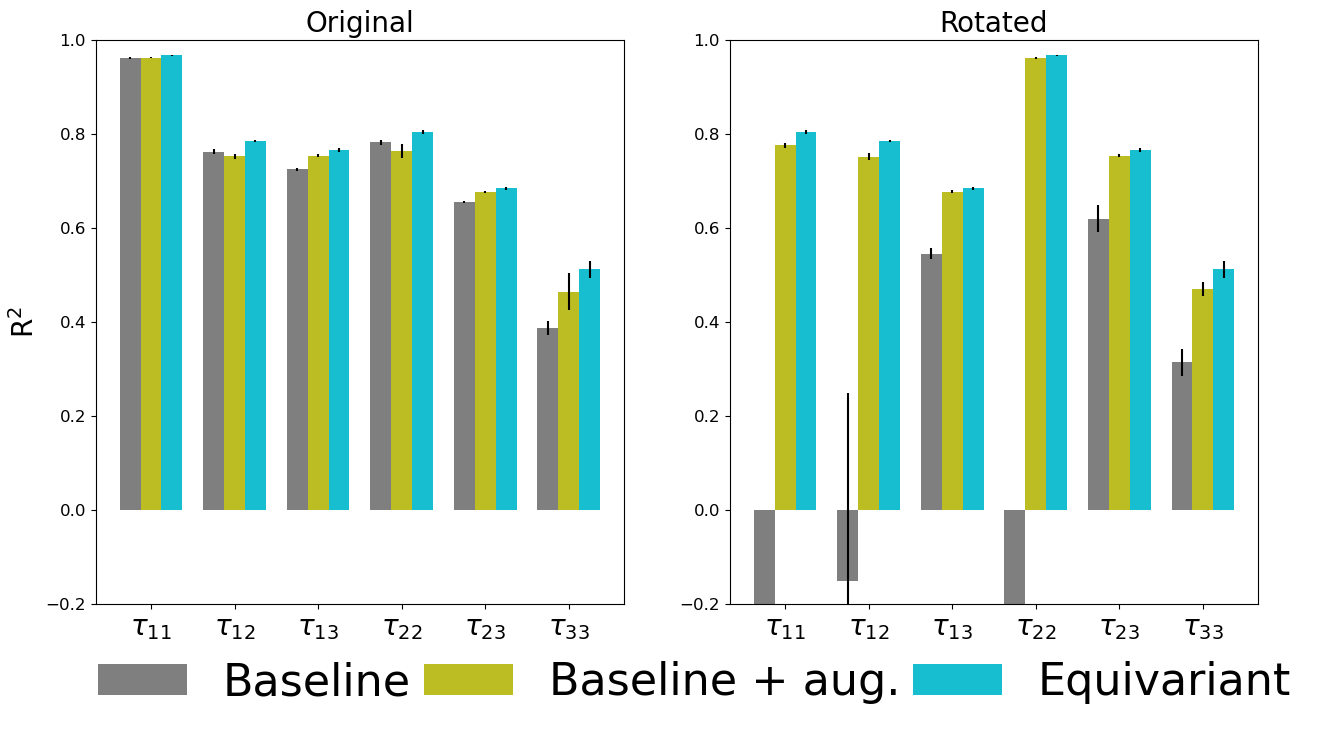

In [5]:
fs=20
ls=12

width = 1  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(1,2,figsize=(15,8))

ncomponent=r2.shape[-2]
component_text = [r'$\tau_{11}$', r'$\tau_{12}$', r'$\tau_{13}$', r'$\tau_{22}$', r'$\tau_{23}$', r'$\tau_{33}$']
nscaling = r2.shape[-3]
scaling_text = ['Baseline','Baseline + aug.','Equivariant']
colors = ['tab:gray','tab:olive','tab:cyan']
x=np.arange(0,(nscaling+1)*ncomponent,nscaling+1)
offset=[-1,0,1]
task_text=['Original','Rotated']

for itask in range(len(task_text)):
    for iscaling in range(nscaling):
        rects = ax[itask].bar(x + offset[iscaling], r2[itask,iscaling,:,0], width, label=scaling_text[iscaling], color=colors[iscaling])
        bars = ax[itask].errorbar(x + offset[iscaling], r2[itask,iscaling,:,0], yerr=r2[itask,iscaling,:,1], linestyle=' ', color='k')
        ax[itask].set_ylim(-.2, 1)
        ax[itask].set_xticks([])
        ax[itask].set_xticks(x, component_text,fontsize=fs) 
        ax[itask].set_title(task_text[itask],fontsize=fs)
        ax[itask].tick_params(axis='y',labelsize=ls)
#             ax[itask].legend(fontsize=32)
ax[0].set_ylabel(r'R$^2$',fontsize=fs)
       

#ax[1,1].legend(ncol=3,fontsize=32,loc='lower right')
fig.subplots_adjust(bottom=0.175)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels, loc='lower left', bbox_to_anchor=(0.1, 0.0),fontsize=32,ncol=3,frameon=False,framealpha=0,columnspacing=0.3)

fmt="eps"
plt.savefig('rotStats.'+fmt,format=fmt)#,transparent=True)